<a href="https://colab.research.google.com/github/JonathanQuang/deepLearningProject/blob/main/pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
!rm -rf deepLearningProject/

In [1]:
import os

"""
replace the below when cloning from the private repo

from getpass import getpass
user = getpass('GitHub user')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/JonathanQuang/deepLearningProject
""" 

"""
Type your username and password into the box in google collab
"""

from getpass import getpass
user = getpass('GitHub user')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/JonathanQuang/deepLearningProject

os.chdir('deepLearningProject/')



GitHub user··········
GitHub password··········
Cloning into 'deepLearningProject'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 103 (delta 14), reused 88 (delta 8), pack-reused 0
Receiving objects: 100% (103/103), 7.62 MiB | 34.99 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 13.1MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp37-none-any.whl size=655251 sha256=c656fd6688ef43187ad7b669b1f23f732cca8064e71746b193eef5a9f9879600
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp37-none-any.whl size=5713 sha256=408aea3bcf096d68fd4a0eb01a5cea791d06ee57dece6a2d54a3d6b433db3801
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [4]:
!bash ./datasets/download_pix2pix_dataset.sh edges2shoes

Streaming output truncated to the last 5000 lines.
edges2shoes/train/46382_AB.jpg
edges2shoes/train/46383_AB.jpg
edges2shoes/train/46384_AB.jpg
edges2shoes/train/46385_AB.jpg
edges2shoes/train/46386_AB.jpg
edges2shoes/train/46387_AB.jpg
edges2shoes/train/46388_AB.jpg
edges2shoes/train/46389_AB.jpg
edges2shoes/train/4638_AB.jpg
edges2shoes/train/46390_AB.jpg
edges2shoes/train/46391_AB.jpg
edges2shoes/train/46392_AB.jpg
edges2shoes/train/449_AB.jpg
edges2shoes/train/44_AB.jpg
edges2shoes/train/45000_AB.jpg
edges2shoes/train/45001_AB.jpg
edges2shoes/train/45002_AB.jpg
edges2shoes/train/45003_AB.jpg
edges2shoes/train/45004_AB.jpg
edges2shoes/train/45005_AB.jpg
edges2shoes/train/45006_AB.jpg
edges2shoes/train/45007_AB.jpg
edges2shoes/train/45008_AB.jpg
edges2shoes/train/45009_AB.jpg
edges2shoes/train/4500_AB.jpg
edges2shoes/train/45010_AB.jpg
edges2shoes/train/45011_AB.jpg
edges2shoes/train/45012_AB.jpg
edges2shoes/train/45013_AB.jpg
edges2shoes/train/45687_AB.jpg
edges2shoes/train/45688_AB

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [5]:
!bash ./scripts/download_pix2pix_model.sh edges2shoes

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [edges2shoes]
for details.

--2021-04-30 07:29:17--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/edges2shoes.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704688 (208M)
Saving to: ‘./checkpoints/edges2shoes_pretrained/latest_net_G.pth’

./checkpoints/edges 100%[===================>] 207.62M  4.03MB/s    in 53s     

2021-04-30 07:30:10 (3.91 MB/s) - ‘./checkpoints/edges2shoes_pretrained/latest_net_G.pth’ saved [217704688/217704688]



# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [11]:
!python train.py --dataroot ./datasets/edges2shoes --name edges2shoes_pix2pix --model pix2pix --direction BtoA

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/edges2shoes        	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                       

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [12]:
!ls checkpoints/

edges2shoes_pix2pix  edges2shoes_pretrained


In [13]:
!python test.py --dataroot ./datasets/edges2shoes --direction BtoA --model pix2pix --name edges2shoes_pretrained

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/edges2shoes        	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

# Visualize

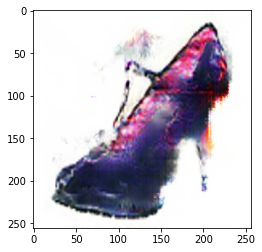

In [21]:
import matplotlib.pyplot as plt

img = plt.imread('./results/edges2shoes_pretrained/test_latest/images/101_AB_fake_B.png')
plt.imshow(img)

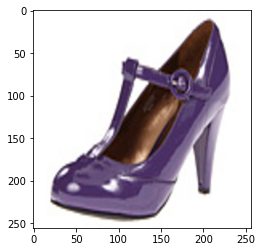

In [20]:
img = plt.imread('./results/edges2shoes_pretrained/test_latest/images/101_AB_real_A.png')
plt.imshow(img)

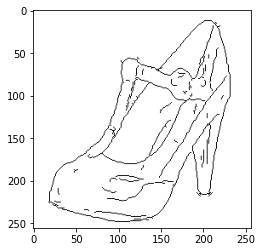

In [19]:
img = plt.imread('./results/edges2shoes_pretrained/test_latest/images/101_AB_real_B.png')
plt.imshow(img)